In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import ROOT

Welcome to JupyROOT 6.28/12


# Worst case scenario

## Radioactive contributions pie chart

In [9]:
Names = np.array(['Mechanical Struc.', 
                  'Steel support lead', 
                  'Ext. Pb', 
                  'IS Pb', 
                  'Ext. PE', 
                  'IS PE', 
                  'CryoShield', 
                  'Vac. Vessel', 
                  '50K Vessel', 
                  '4K Vessel', 
                  'Still', 
                  'CaWO4 crystal', 
                  'Al2O3 crystal'])
colors=['darkblue', 'mediumblue', 'darkgrey', 'lightgray', 'gold', 'khaki', 'black', 'peachpuff', 'sandybrown', 'chocolate', 'saddlebrown', 'crimson', 'pink', 'deeppink', 'darkturquoise', 'cadetblue', 'teal', 'mediumseagreen', 'yellowgreen', 'darkgreen']
CaWO4_rate = np.array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09], [0.08, 0.08, 0.08, 0.06, 0.09, 0.08], [0.09, 0.09, 0.09, 0.09, 0.09, 0], [0.09, 0.09, 0.08, 0.09, 0.09, 0.09], [0.09, 0.04, 0.08, 0.08, 0.08, 0.09], [0.09, 0.09, 0.09, 0.09, 0.09, 0.05], [0.04*0.26/0.3, 0.18*0.24/0.3, 0.07*0.54/0.46, 0.22*0.8/1.4, 0.09*0.03/0.5, 0.22*0.8/1.4], [0.09, 0.09, 0.09, 0.04, 0.04, 0.09],
                       [0.07, 0.09, 0.08, 0.04, 0.08, 0.04], [0.09, 0.09, 0.08, 0.09, 0.09, 0.09], [0.05, 0.09, 0.09, 0.09, 0.09, 0.09],
                       [15.20/100., 0.8/100., 10.54/100.,  0, 0, 0], [0.09/100., 0.09/100., 0.09/100., 0, 0, 0]])
CaWO4_not_upper_lim = np.array([[0, 1, 0, 1, 0, 0], [0, 1., 0., 1., 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0], [0., 1, 1, 1, 1, 1], [0., 0., 0., 0, 0, 0], [0., 0., 1, 1, 1, 1],
                                [0., 0., 1, 1, 1, 1], [0, 0, 1, 1, 1, 1], 
                                [1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0]])
Activities_max = np.array([[0.17, 0.012, 0.016, 0.006, 0.098, 0.0034, 0], 
                           [0.17, 0.012, 0.016, 0.006, 0.098, 0.0034, 0], 
                           [0.27, 0.0028, 89, 0.016, 0.013, 0.095, 0.032], 
                           [0.31, 0.0106, 40, 0.015, 0.014, 0.071, 0.029], 
                           [0.021, 0.0027, 0.0010, 0.0015, 0.013, 0.00073, 0], 
                           [0.021, 0.0027, 0.0010, 0.0015, 0.013, 0.00073, 0], 
                           [3.5, 0.0083, 0.040, 0.37, 0.16, 0.13, 0], 
                           [3.5, 0.0083, 0.040, 0.37, 0.16, 0.13, 0], 
                           [10, 0.042, 0.12, 0.32, 0.52, 0.5, 0], 
                           [0.076, 0.014, 0.014, 0.13, 0.0062, 0, 0], 
                           [0.092, 0.0035, 0.0035, 0.0033, 0.0041, 0.023, 0.0038], 
                           [0.092,0.0035,0.0035, 0.0024, 0.0025, 0.023, 0.0023]])

In [10]:
def pie_chart(values, labels, colors, ax):

    # Add code
    wedges,texts=ax[1].pie(values[:len(values)],startangle=40, colors=colors, radius=1.5)
    plt.setp(wedges, width=0.8, edgecolor='white')

    porcent = 100.*values/values.sum()
    labels_leg = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]
    ax[0].legend(wedges, labels_leg,
            fontsize=10, frameon=False, loc='center left')
    ax[0].axis('off')
        
    plt.show()

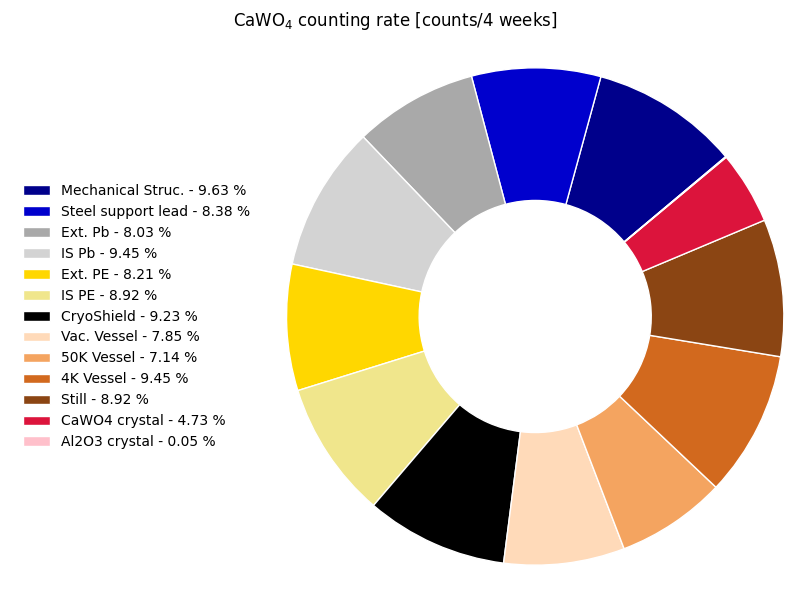

In [11]:
fig1,ax1=plt.subplots(1, 2, tight_layout=True, figsize=(8, 6), width_ratios=[1, 2])
fig1.suptitle(r'CaWO$_4$ counting rate [counts/4 weeks]')
pie_chart(np.sum(CaWO4_rate, axis=1), Names, colors, ax1)
#pie_chart(np.sum(values_CaWO4, axis=1), Names, np.append(colors, ['mediumvioletred', 'pink']), ax1)
fig1.savefig('Figs/pie_CaWO4_uppervalues.png')

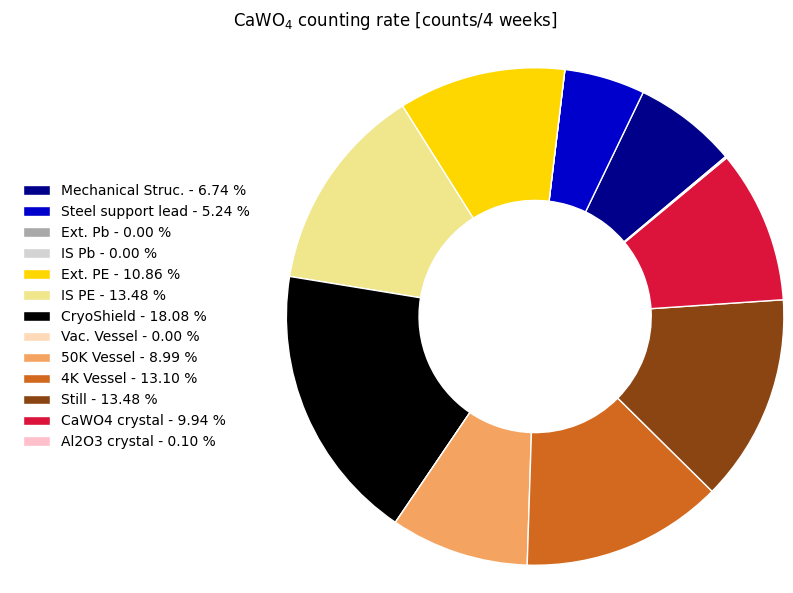

In [12]:
fig1,ax1=plt.subplots(1, 2, tight_layout=True, figsize=(8, 6), width_ratios=[1, 2])
fig1.suptitle(r'CaWO$_4$ counting rate [counts/4 weeks]')
pie_chart(np.sum(CaWO4_rate*CaWO4_not_upper_lim, axis=1), Names, colors, ax1)
#pie_chart(np.sum(values_CaWO4, axis=1), Names, np.append(colors, ['mediumvioletred', 'pink']), ax1)
fig1.savefig('Figs/pie_CaWO4_lowervalues.png')

In [13]:
i=6
print(Names[i])
sum(CaWO4_rate[i])

CryoShield


0.5176691511387164

In [14]:
sum(sum(CaWO4_rate[:]))

5.605769151138716

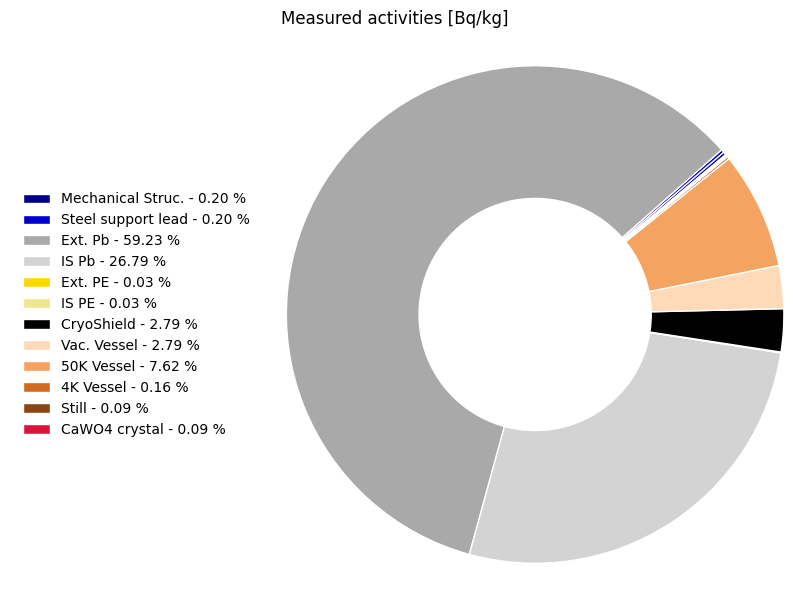

In [15]:
fig1,ax1=plt.subplots(1, 2, tight_layout=True, figsize=(8, 6), width_ratios=[1, 2])
fig1.suptitle(r'Measured activities [Bq/kg]')
pie_chart(np.sum(Activities_max, axis=1), Names, colors, ax1)
#pie_chart(np.sum(values_CaWO4, axis=1), Names, np.append(colors, ['mediumvioletred', 'pink']), ax1)
fig1.savefig('Figs/pie_Activities.png')